In [ ]:
# Source: Soybase (https://www.soybase.org/snps/)

**SoySNP50K iSelect BeadChip Data for 20,087 G. max and G. soja accessions genotyped with 42,509 SNPs (Wm82.a2)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

scikit-allel is a Python package intended to enable exploratory analysis of large-scale genetic variation

# 1. Import the libraries

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py  # hdf5 file 
import allel;  # # import scikit-allel
print('scikit-allel', allel.__version__) # check which version is installed

scikit-allel 1.3.5


# 1.1 Data files

1) Description of 19,648 Glycine max and G. soja accessions genotyped with the SoySNP50K BeadChip
Supplementary table S1 from Song et al., 2015. G3: Genes| Genomes| Genetics 50(10):1999-2006.
2) complete data set for 20,087 G. max and G. soja accessions genotyped with 42,509 SNPs (Wm82.a2) in vcf, bcf format. 
'soysnp50k_wm82.a2_41317.vcf.gz'
3) Minor Allele Frequencies (MAF) of SNPs https://www.soybase.org/snps/snp50k_maf.txt

# 1.2 Read data files

## 1.2.1 Soybean USDA lines

In [3]:
lines=pd.read_excel(open('Soy_USDA_Lines_descritpion.xlsx', 'rb'), sheet_name='Sheet1', skiprows=[0])  
lines.head()

,PI,Subcollection*,Country*,MG*,Similarity >99.9% to other accessions,Landrace or N. Am. cultivar used for analysis,Seed weight*
0,FC001547,G. max,China,II,NaN,Landrace,NaN
1,FC003654_1,G. max,China,IV,NaN,Landrace,NaN
2,FC003659,G. max,China,VI,NaN,Landrace,8.6
3,FC030685,G. max,Japan,ZZ,NaN,Landrace,31.6
4,FC031571,G. max,China,III,NaN,Landrace,NaN


## 1.2.2 Soybean 50k data

## 1.2.2.1 Read vcf file

In [2]:
# import scikit-allel
import allel
# check which version is installed
print(allel.__version__)

1.3.5


In [3]:
callset = allel.read_vcf('soysnp50k_wm82.a2_41317.vcf.gz')

In [4]:
# read_vcf reads the vcf file as dictionary; print keys of dataset
sorted(callset.keys())

['calldata/GT',
 'samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/QUAL',
 'variants/REF']

Arrays with keys beginning ‘calldata/’ come from the sample fields; keys beginning 'variants/' are coming from SNP fileds

### What's the datatype of each key (1d or 2d or 3d array)?

In [5]:
print('Genotypes:',callset['calldata/GT'].shape)
print('samples:',callset['samples'].shape)
print('Alt_allele:',callset['variants/ALT'].shape)
print('Chr #:',callset['variants/CHROM'].shape)
print('Filter:',callset['variants/FILTER_PASS'].shape)
print('SNP:',callset['variants/ID'].shape)
print('PhyPos:',callset['variants/POS'].shape)
print('Quality:','Qual:',callset['variants/QUAL'].shape)
print('Ref_allele:',callset['variants/REF'].shape)

Genotypes: (42195, 20087, 2)
samples: (20087,)
Alt_allele: (42195, 3)
Chr #: (42195,)
Filter: (42195,)
SNP: (42195,)
PhyPos: (42195,)
Quality: Qual: (42195,)
Ref_allele: (42195,)


## What values each key contains?

In [6]:
geno=callset['calldata/GT'] 
geno[:1]

array([[[ 1,  1],
        [ 0,  0],
        [-1, -1],
        ...,
        [ 0,  0],
        [ 0,  0],
        [ 0,  1]]], dtype=int8)

In [7]:
# ‘samples’ array contains samples (extracted from the header line in the VCF file)
samples=callset['samples']
samples

array(['PI86046', 'PI90208', 'PI219698', ..., 'PI587906', 'PI587946',
       'PI603516'], dtype=object)

In [8]:
Alt_allele=callset['variants/ALT']
Alt_allele

array([['G', '', ''],
       ['T', '', ''],
       ['G', '', ''],
       ...,
       ['T', '', ''],
       ['T', '', ''],
       ['A', '', '']], dtype=object)

In [9]:
Chr_num=callset['variants/CHROM']
Chr_num

array(['Chr01', 'Chr01', 'Chr01', ..., 'scaffold_759', 'scaffold_843',
       'scaffold_91'], dtype=object)

In [10]:
Filter=callset['variants/FILTER_PASS']
Filter

array([False, False, False, ..., False, False, False])

In [11]:
SNP=callset['variants/ID']
SNP

array(['ss715578788', 'ss715578818', 'ss715578923', ..., 'ss715623959',
       'ss715584606', 'ss715633065'], dtype=object)

In [12]:
Phy_pos=callset['variants/POS']
Phy_pos

array([24952, 26003, 29671, ...,  4974,  3015, 24874])

In [13]:
Quality=callset['variants/QUAL']
Quality

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [14]:
Ref_allele=callset['variants/REF']
Ref_allele

array(['A', 'C', 'A', ..., 'C', 'C', 'G'], dtype=object)

# 1.2.2.2 convert vcf file to dataframe (vcf_to_dataframe)

The vcf_to_dataframe() function extracts all data except samples and genotyping calls from a VCF and loads into a df.

In [15]:
df1 = allel.vcf_to_dataframe('soysnp50k_wm82.a2_41317.vcf.gz')
df1.head()

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,FILTER_PASS
0,Chr01,24952,ss715578788,A,G,NaN,NaN,NaN,False
1,Chr01,26003,ss715578818,C,T,NaN,NaN,NaN,False
2,Chr01,29671,ss715578923,A,G,NaN,NaN,NaN,False
3,Chr01,30712,ss715578960,G,A,NaN,NaN,NaN,False
4,Chr01,37018,ss715579193,C,T,NaN,NaN,NaN,False


In [16]:
df1.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT_1', 'ALT_2', 'ALT_3', 'QUAL',
       'FILTER_PASS'],
      dtype='object')

## Required columns from df1

In [17]:
df1_data=df1[['ID','CHROM', 'POS', 'REF', 'ALT_1']]
df1_data.head()

,ID,CHROM,POS,REF,ALT_1
0,ss715578788,Chr01,24952,A,G
1,ss715578818,Chr01,26003,C,T
2,ss715578923,Chr01,29671,A,G
3,ss715578960,Chr01,30712,G,A
4,ss715579193,Chr01,37018,C,T


In [18]:
df1.to_csv('Soy50K_SNPs_Chr_GenPos.csv')

In [20]:
df1_data.shape

(42195, 5)

In [21]:
df1_data.to_csv('soy50k_SNPs_chromosomes.csv')

# 1.2.3 Minor allele frequency dataset

In [22]:
MAF=pd.read_csv('MAF_soy50K_SNPs.csv')
MAF.drop('maf_value.1', axis=1, inplace=True)
MAF=MAF.iloc[:,1:]
MAF.head()

,snp_name,dbSNP_ID,maf_type,maf_value,minor_allele
0,BARC_1.01_Gm01_2033_G_A,ss715578672,MAF in landrace,nd,nd
1,BARC_1.01_Gm01_2033_G_A,ss715578672,MAF in elite,nd,nd
2,BARC_1.01_Gm01_2033_G_A,ss715578672,MAF in G. max,nd,nd
3,BARC_1.01_Gm01_2033_G_A,ss715578672,MAF in G. soja,nd,nd
4,BARC_1.01_Gm01_2033_G_A,ss715578672,"MAF in landrace, elite & G. soja",nd,nd


In [23]:
# Rename columns names
MAF.rename(columns={'dbSNP_ID':'ID', 'snp_name':'SNP_Name', 'maf_type':'MAF_type','maf_value':'MAF_value', 'minor_allele':'Minor_Allele'}, inplace=True)
MAF.columns

Index(['SNP_Name', 'ID', 'MAF_type', 'MAF_value', 'Minor_Allele'], dtype='object')

In [24]:
MAF=MAF[['ID','SNP_Name', 'MAF_type', 'MAF_value', 'Minor_Allele']]
MAF.head(15)

,ID,SNP_Name,MAF_type,MAF_value,Minor_Allele
0,ss715578672,BARC_1.01_Gm01_2033_G_A,MAF in landrace,nd,nd
1,ss715578672,BARC_1.01_Gm01_2033_G_A,MAF in elite,nd,nd
2,ss715578672,BARC_1.01_Gm01_2033_G_A,MAF in G. max,nd,nd
3,ss715578672,BARC_1.01_Gm01_2033_G_A,MAF in G. soja,nd,nd
4,ss715578672,BARC_1.01_Gm01_2033_G_A,"MAF in landrace, elite & G. soja",nd,nd
5,ss715578788,BARC_1.01_Gm01_24939_A_G,MAF in landrace,0.335,G
6,ss715578788,BARC_1.01_Gm01_24939_A_G,MAF in elite,0.078,G
7,ss715578788,BARC_1.01_Gm01_24939_A_G,MAF in G. max,0.199,G
8,ss715578788,BARC_1.01_Gm01_24939_A_G,MAF in G. soja,0.167,G
9,ss715578788,BARC_1.01_Gm01_24939_A_G,"MAF in landrace, elite & G. soja",0.196,G


In [25]:
MAF.shape

(304000, 5)

Since maf_type column contains 5 different variables, several duplicate values of snp_name, dbSNP_ID are observed. So, I am changing the MAF to pivot table and then converting to dataframe (reduces the row count i.e 1 row per each snp_name or ID)

In [26]:
MAF1=MAF.pivot(index=['ID','SNP_Name'], columns='MAF_type', values=['MAF_value','Minor_Allele'])
MAF1.head()

MAF_value                 \
MAF_type                                MAF in G. max MAF in G. soja   
ID          SNP_Name                                                   
ss715578401 BARC_1.01_Gm01_10015701_G_A         0.126          0.126   
ss715578402 BARC_1.01_Gm01_10052330_C_T         0.126          0.117   
ss715578403 BARC_1.01_Gm01_1006696_C_T          0.487          0.021   
ss715578404 BARC_1.01_Gm01_10074809_T_C         0.126          0.387   
ss715578405 BARC_1.01_Gm01_1009248_G_A             nd             nd   

                                                                      \
MAF_type                                MAF in elite MAF in landrace   
ID          SNP_Name                                                   
ss715578401 BARC_1.01_Gm01_10015701_G_A        0.021           0.234   
ss715578402 BARC_1.01_Gm01_10052330_C_T        0.021           0.234   
ss715578403 BARC_1.01_Gm01_1006696_C_T         0.474             0.5   
ss715578404 BARC_1.01_Gm01_10074809_T_C        0.021           0.234   
ss715578405 BARC_1.01_Gm01_1009248_G_A            nd              nd   

                                                                          \
MAF_type                                MAF in landrace, elite & G. soja   
ID          SNP_Name                                                       
ss715578401 BARC_1.01_Gm01_10015701_G_A                            0.375   
ss715578402 BARC_1.01_Gm01_10052330_C_T                            0.385   
ss715578403 BARC_1.01_Gm01_1006696_C_T                             0.332   
ss715578404 BARC_1.01_Gm01_10074809_T_C                            0.291   
ss715578405 BARC_1.01_Gm01_1009248_G_A                                nd   

                                         Minor_Allele                 \
MAF_type                                MAF in G. max MAF in G. soja   
ID          SNP_Name                                                   
ss715578401 BARC_1.01_Gm01_10015701_G_A             A              G   
ss715578402 BARC_1.01_Gm01_10052330_C_T             T              C   
ss715578403 BARC_1.01_Gm01_1006696_C_T              T              T   
ss715578404 BARC_1.01_Gm01_10074809_T_C             C              T   
ss715578405 BARC_1.01_Gm01_1009248_G_A             nd             nd   

                                                                      \
MAF_type                                MAF in elite MAF in landrace   
ID          SNP_Name                                                   
ss715578401 BARC_1.01_Gm01_10015701_G_A            A               A   
ss715578402 BARC_1.01_Gm01_10052330_C_T            T               T   
ss715578403 BARC_1.01_Gm01_1006696_C_T             T               C   
ss715578404 BARC_1.01_Gm01_10074809_T_C            C               C   
ss715578405 BARC_1.01_Gm01_1009248_G_A            nd              nd   

                                                                          
MAF_type                                MAF in landrace, elite & G. soja  
ID          SNP_Name                                                      
ss715578401 BARC_1.01_Gm01_10015701_G_A                                A  
ss715578402 BARC_1.01_Gm01_10052330_C_T                                T  
ss715578403 BARC_1.01_Gm01_1006696_C_T                                 T  
ss715578404 BARC_1.01_Gm01_10074809_T_C                                C  
ss715578405 BARC_1.01_Gm01_1009248_G_A                                nd

In [27]:
MAF1.shape

(60800, 10)

In [28]:
MAF1.index[:5] # it had multi index

MultiIndex([('ss715578401', 'BARC_1.01_Gm01_10015701_G_A'),
            ('ss715578402', 'BARC_1.01_Gm01_10052330_C_T'),
            ('ss715578403',  'BARC_1.01_Gm01_1006696_C_T'),
            ('ss715578404', 'BARC_1.01_Gm01_10074809_T_C'),
            ('ss715578405',  'BARC_1.01_Gm01_1009248_G_A')],
           names=['ID', 'SNP_Name'])

## converting pivoted table to dataframe

In [29]:
MAF1.columns = MAF1.columns.droplevel(0) #remove MAF_value, Minor_Allele
MAF1.columns.name = None               #remove MAF_type
MAF1 = MAF1.reset_index()                #index to columns

In [30]:
MAF1.head()

,ID,SNP_Name,MAF in G. max,MAF in G. soja,MAF in elite,MAF in landrace,"MAF in landrace, elite & G. soja",MAF in G. max,MAF in G. soja,MAF in elite,MAF in landrace,"MAF in landrace, elite & G. soja"
0,ss715578401,BARC_1.01_Gm01_10015701_G_A,0.126,0.126,0.021,0.234,0.375,A,G,A,A,A
1,ss715578402,BARC_1.01_Gm01_10052330_C_T,0.126,0.117,0.021,0.234,0.385,T,C,T,T,T
2,ss715578403,BARC_1.01_Gm01_1006696_C_T,0.487,0.021,0.474,0.5,0.332,T,T,T,C,T
3,ss715578404,BARC_1.01_Gm01_10074809_T_C,0.126,0.387,0.021,0.234,0.291,C,T,C,C,C
4,ss715578405,BARC_1.01_Gm01_1009248_G_A,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd


So far, all three datasets are loaded and checked what features are available










## 2. Data Wrangling and merging of files 



Since data type of each key values are different (1d, 2d, 3d arrays); converting all into 2D arrays for easy concatenation

## 2.1 Wrangle genotyped data

scikit-allel has GenotypeArray() class, which adds some convenient functionality to an array of genotype calls. 

In [31]:
# Genotype array
genotypes=allel.GenotypeArray(geno)
genotypes

<GenotypeArray shape=(42195, 20087, 2) dtype=int8>
1/1 0/0 ./. 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/1
1/1 0/0 ./. 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/1
1/1 0/0 0/1 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/1
...
0/0 0/0 0/0 0/0 1/1 ... 0/0 0/0 0/0 1/1 ./.
0/0 1/1 1/1 1/1 1/1 ... 1/1 0/0 1/1 0/1 1/1
0/0 0/0 0/0 0/0 1/1 ... 0/0 0/0 0/0 ./. 0/0

##### Allele count, i.e., count the number times each allele (0=reference, 1=first alternate, 2=second alternate, etc.) is observed for each variant

Note: notice that we have only 1 alternate allele, indicates SNP are biallelic

In [32]:
ac = genotypes.count_alleles()
ac

<AlleleCountsArray shape=(42195, 2) dtype=int32>
30113  9903
29867  9835
27974 11918
...
32071  7905
10712 29000
33638  4566

## 2.1.1 Reshape genotype array to view it as haplotypes by dropping the ploidy dimension

to_haplotypes() generates hapotype arrays with doubled the number of samples (from 20087 to 40174); each value (1/1) is split in to two columns (1 and 1). 

In [33]:
haps=genotypes.to_haplotypes() 
haps

<HaplotypeArray shape=(42195, 40174) dtype=int8>
1 1 0 0 . ... 0 0 0 0 1
1 1 0 0 . ... 0 0 0 0 1
1 1 0 0 0 ... 0 0 0 0 1
...
0 0 0 0 0 ... 0 1 1 . .
0 0 1 1 1 ... 1 0 1 1 1
0 0 0 0 0 ... 0 . . 0 0

In [34]:
# create dataframe of haplotypes by transposing the array (with out transposing, memory is too much and getting error)
haps_df=pd.DataFrame(haps.T)
haps_df.head()

# rows are samples, columns are variants/SNPs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,42170,42171,42172,42173,42174,42175,42176,42177,42178,42179,42180,42181,42182,42183,42184,42185,42186,42187,42188,42189,42190,42191,42192,42193,42194
0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,-1,-1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,-1,-1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
4,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0


In [37]:
# combining allele call for every two rows to reduce samples from 40174 to 20087
result = haps_df.groupby(np.arange(len(haps_df))//2).sum()
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,42170,42171,42172,42173,42174,42175,42176,42177,42178,42179,42180,42181,42182,42183,42184,42185,42186,42187,42188,42189,42190,42191,42192,42193,42194
0,2,2,2,0,0,0,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,0,-2,-2,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,...,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,0,2,0
2,-2,-2,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,2,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,0,2,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,2,2,0,2,0
4,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,2,2,2


Genotyping data calls: 0 reference allele, 2 alternate allele, 1 het, -2 consider as missing

In [38]:
# transpose the dataframe to keep samples as columns and SNPs as rows
result_df=result.T
result_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086
0,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1
1,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1
2,2,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2


## 2.1.2 Add sample names as column headers to result_df

### samples array (header line from VCF file)

In [39]:
# sampels array
samples=callset['samples']
print(samples.size)
samples

20087


array(['PI86046', 'PI90208', 'PI219698', ..., 'PI587906', 'PI587946',
       'PI603516'], dtype=object)

In [40]:
# convert samples array to dataframe
df2 = pd.DataFrame(data = samples)
#df2.columns=['GEName']
df2.head()

,0
0,PI86046
1,PI90208
2,PI219698
3,PI253651A
4,PI347550A


In [41]:
# transpose samples dataframe
samples_df=df2.T
samples_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086
0,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,PI437633A,...,OAC-Salem,OAC-Sparta,OAC-Stratford,OAC-Thames,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516


In [42]:
# column headers of dataframe
samples_df.columns = samples_df.iloc[0]
samples_df

,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,PI437633A,...,OAC-Salem,OAC-Sparta,OAC-Stratford,OAC-Thames,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516
0,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,PI437633A,...,OAC-Salem,OAC-Sparta,OAC-Stratford,OAC-Thames,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516


### Add sample names as column headers

In [43]:
genotypes_df=pd.DataFrame(data=result_df.values, columns=samples_df.iloc[0])
genotypes_df.head()

,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,PI437633A,...,OAC-Salem,OAC-Sparta,OAC-Stratford,OAC-Thames,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516
0,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1
1,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1
2,2,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2


## 2.1.3 Add variants/ID col values as index values to genotype_df

In [44]:
# SNPs/variants array
SNPs=callset['variants/ID']
print(SNPs.size)
SNPs

42195


array(['ss715578788', 'ss715578818', 'ss715578923', ..., 'ss715623959',
       'ss715584606', 'ss715633065'], dtype=object)

In [45]:
# convert SNPs array to dataframe
SNP_df = pd.DataFrame(data = SNPs)
SNP_df.columns=['ID']
SNP_df.head()

,ID
0,ss715578788
1,ss715578818
2,ss715578923
3,ss715578960
4,ss715579193


In [46]:
# joining SNP column to genotypes_df
genotypes_df = genotypes_df.join(SNP_df["ID"])
genotypes_df.head()

,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,PI437633A,...,OAC-Sparta,OAC-Stratford,OAC-Thames,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516,ID
0,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,ss715578788
1,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,ss715578818
2,2,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,ss715578923
3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ss715578960
4,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2,ss715579193


## 2.1.4 rearrange columns of genotypes_df

In [47]:
cols = genotypes_df.columns.tolist()
#print(cols)
cols = cols[-1:] + cols[:-1]
#print(cols)
genotypes_df1= genotypes_df[cols]
genotypes_df1.head()

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,...,OAC-Salem,OAC-Sparta,OAC-Stratford,OAC-Thames,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516
0,ss715578788,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1
1,ss715578818,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1
2,ss715578923,2,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1
3,ss715578960,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ss715579193,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2


#### Genotyping data calls: 0 reference allele, 2 alternate allele, 1 het, -2 consider as missing



## 2.1.5 adding new columns for 0: Ref_allele, 2:Alt_allele, 1:Het, -2:Missing, perc_miss

### Create new columns by Counting the frequency of a specific value in each row of dataframe?

In [48]:
genotypes_df1['Ref_allele'] = genotypes_df1.apply(lambda row: sum(row[1:20088]==0) ,axis=1)
genotypes_df1['Alt_allele'] = genotypes_df1.apply(lambda row: sum(row[1:20088]==2) ,axis=1)
genotypes_df1['Het'] = genotypes_df1.apply(lambda row: sum(row[1:20088]==1) ,axis=1)
genotypes_df1['Missing'] = genotypes_df1.apply(lambda row: sum(row[1:20088]==-2) ,axis=1)
genotypes_df1.head()

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,...,PRO-280,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Het,Missing
0,ss715578788,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,14963,4858,187,79
1,ss715578818,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,14761,4745,345,236
2,ss715578923,2,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,13915,5887,144,141
3,ss715578960,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18053,1825,54,155
4,ss715579193,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2,17246,2608,174,59


In [49]:
# create percent missing column by dividing missing value with total samples#
genotypes_df1['perc_miss']=(genotypes_df1['Missing']/20088)
genotypes_df1.head()

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417508,PI417521,PI423734,PI423923,PI424145,PI424159A,PI424241,PI424485,PI424549B,PI437196,PI437199,PI437619,...,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Het,Missing,perc_miss
0,ss715578788,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,14963,4858,187,79,0.003933
1,ss715578818,2,0,-2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,14761,4745,345,236,0.011748
2,ss715578923,2,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,13915,5887,144,141,0.007019
3,ss715578960,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18053,1825,54,155,0.007716
4,ss715579193,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2,17246,2608,174,59,0.002937


## 2.1.6 Distribution of Missing values

C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Missing', ylabel='Count'>

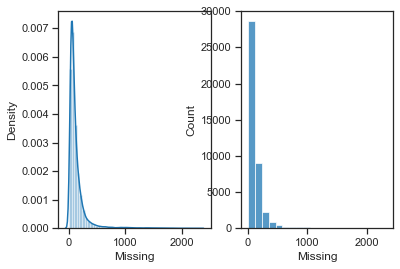

In [50]:
fig, ax =plt.subplots(1,2)
sns.distplot(genotypes_df1['Missing'], kde=True, ax=ax[0])
sns.histplot(genotypes_df1['Missing'], bins=20, ax=ax[1])


C:\Users\gellima\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Het', ylabel='Count'>

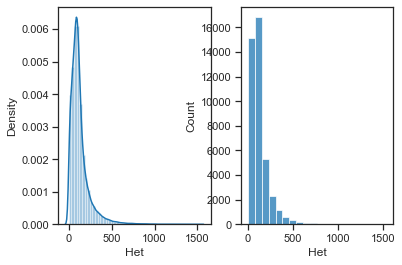

In [51]:
fig, ax =plt.subplots(1,2)
sns.distplot(genotypes_df1['Het'], kde=True, ax=ax[0])
sns.histplot(genotypes_df1['Het'], bins=20, ax=ax[1])


In [52]:
# Number of Rows with >1000 Missing values 
genotypes_df1[genotypes_df1['Missing']>1000].count()['ID']

509

In [53]:
# Number of Rows with >1000 Missing values 
genotypes_df1[genotypes_df1['Het']>500].count()['ID']

720

## 2.1.7 write genotyping data to csv

In [54]:
genotypes_df1.to_csv('Genotyping_data.csv')

# 



# 2.2 Combine df1_data (partial genotyping data) and MAF1 dataframes

In [55]:
merge_data=df1_data.merge(MAF1, how='inner', left_on='ID', right_on='ID')
merge_data.head()

,ID,CHROM,POS,REF,ALT_1,SNP_Name,MAF in G. max,MAF in G. soja,MAF in elite,MAF in landrace,"MAF in landrace, elite & G. soja",MAF in G. max,MAF in G. soja,MAF in elite,MAF in landrace,"MAF in landrace, elite & G. soja"
0,ss715578788,Chr01,24952,A,G,BARC_1.01_Gm01_24939_A_G,0.199,0.167,0.078,0.335,0.196,G,G,G,G,G
1,ss715578818,Chr01,26003,C,T,BARC_1.01_Gm01_25990_C_T,0.193,0.169,0.068,0.328,0.193,T,T,T,T,T
2,ss715578923,Chr01,29671,A,G,BARC_1.01_Gm01_29658_A_G,0.204,0.139,0.078,0.346,0.427,G,A,G,G,G
3,ss715578960,Chr01,30712,G,A,BARC_1.01_Gm01_30699_G_A,0.059,0.121,0.021,0.106,0.084,A,A,A,A,A
4,ss715579193,Chr01,37018,C,T,BARC_1.01_Gm01_37005_C_T,0.122,0.031,0.057,0.195,0.096,T,T,T,T,T


In [56]:
merge_data.shape

(42195, 16)

In [57]:
df1_data.shape

(42195, 5)

# 2.3 Then, concatenate genotypes1_df, eariler merged dataframes as final dataset


In [58]:
combined_dataset=merge_data.merge(genotypes_df1, how='inner', left_on='ID', right_on='ID')
combined_dataset.head()

,ID,CHROM,POS,REF,ALT_1,SNP_Name,MAF in G. max,MAF in G. soja,MAF in elite,MAF in landrace,"MAF in landrace, elite & G. soja",MAF in G. max,MAF in G. soja,MAF in elite,MAF in landrace,"MAF in landrace, elite & G. soja",PI86046,PI90208,PI219698,PI253651A,PI347550A,PI398807,PI408055A,PI408069,PI408169A,...,RCH-Bobcat,SW33-08,TN-5-92,Turner,Westag-97,PI437935,PI506887,PI567154,PI567170B,PI567264A,PI574480B,PI578360,PI578362,PI639693,PI657626,PI634759,PI423967,PI587906,PI587946,PI603516,Ref_allele,Alt_allele,Het,Missing,perc_miss
0,ss715578788,Chr01,24952,A,G,BARC_1.01_Gm01_24939_A_G,0.199,0.167,0.078,0.335,0.196,G,G,G,G,G,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,14963,4858,187,79,0.003933
1,ss715578818,Chr01,26003,C,T,BARC_1.01_Gm01_25990_C_T,0.193,0.169,0.068,0.328,0.193,T,T,T,T,T,2,0,-2,0,0,0,0,0,2,...,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,14761,4745,345,236,0.011748
2,ss715578923,Chr01,29671,A,G,BARC_1.01_Gm01_29658_A_G,0.204,0.139,0.078,0.346,0.427,G,A,G,G,G,2,0,1,0,0,0,0,0,2,...,0,0,2,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,13915,5887,144,141,0.007019
3,ss715578960,Chr01,30712,G,A,BARC_1.01_Gm01_30699_G_A,0.059,0.121,0.021,0.106,0.084,A,A,A,A,A,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18053,1825,54,155,0.007716
4,ss715579193,Chr01,37018,C,T,BARC_1.01_Gm01_37005_C_T,0.122,0.031,0.057,0.195,0.096,T,T,T,T,T,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,-2,0,0,2,0,0,0,0,0,0,-2,17246,2608,174,59,0.002937


In [59]:
combined_dataset.shape

(42195, 20108)

In [ ]:
combined_dataset.to_csv('Final_soy50k_data.csv')